In [1]:
import os
import time
import uuid
import cv2

In [2]:
IMAGES_PATH = os.path.join('data','images')
number_images = 30

In [3]:
cap = cv2.VideoCapture(0)
for imgnum in range(number_images):
    print('Collecting image {}'.format(imgnum))
    ret, frame = cap.read()
    imgname = os.path.join('C:/Users/Admin/Downloads/data images',f'{str(uuid.uuid1())}.jpg')
    cv2.imwrite(imgname, frame)
    cv2.imshow('frame', frame)
    time.sleep(0.5)

    if cv2.waitKey(1) & 0xFF == ord('q'):
        break
cap.release()
cv2.destroyAllWindows()

In [4]:
!labelme

C:\Users\Admin\anaconda3\Lib\site-packages\paramiko\transport.py:219: CryptographyDeprecationWarning: Blowfish has been deprecated
  "class": algorithms.Blowfish,
[INFO   ] __init__:get_config:70 - Loading config file from: C:\Users\Admin\.labelmerc


In [5]:
# Import TF and Deps

import tensorflow as tf
import json
import numpy as np
from matplotlib import pyplot as plt

In [6]:
# Avoid OOM errors by setting GPU Memory Consumption Growth
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus: 
    tf.config.experimental.set_memory_growth(gpu, True)

In [7]:
IMAGES_PATH = os.path.join('data', 'images')
number_images = 30

cap = cv2.VideoCapture(0)

for imgnum in range(number_images):
    # ...
    imgname = os.path.join('C:/Users/Admin/Downloads/data images', f'{str(uuid.uuid1())}.jpg')
    cv2.imwrite(imgname, frame)    
# "C:\Users\Admin\Downloads\data images"    

In [8]:
tf.config.list_physical_devices('GPU')

[]

In [9]:
# Load Image into TF Data Pipeline
images = tf.data.Dataset.list_files('C:/Users/Admin/Downloads/data images')

In [10]:
import os
print(os.getcwd())

C:\Users\Admin\Downloads


In [11]:
import os

image_files = [f for f in os.listdir("C:/Users/Admin/Downloads/data images") if f.endswith('.jpg')]
print(image_files)

['3c4c4eb0-5f8a-11ee-b9b7-8c16455bd4ce.jpg', '3c4c4eb1-5f8a-11ee-9db5-8c16455bd4ce.jpg', '3c4eb0e1-5f8a-11ee-ba63-8c16455bd4ce.jpg', '3c51148e-5f8a-11ee-8f57-8c16455bd4ce.jpg', '3c51148f-5f8a-11ee-9b55-8c16455bd4ce.jpg', '3c53754e-5f8a-11ee-b4ea-8c16455bd4ce.jpg', '3c548719-5f8a-11ee-ba65-8c16455bd4ce.jpg', '3c55e708-5f8a-11ee-a8d1-8c16455bd4ce.jpg', '3c55e709-5f8a-11ee-a858-8c16455bd4ce.jpg', '3c584aaa-5f8a-11ee-a057-8c16455bd4ce.jpg', '3c584aab-5f8a-11ee-ad7d-8c16455bd4ce.jpg', '3c5aabb6-5f8a-11ee-93af-8c16455bd4ce.jpg', '3c5d0ddb-5f8a-11ee-9c61-8c16455bd4ce.jpg', '3c5d0ddc-5f8a-11ee-ba0d-8c16455bd4ce.jpg', '3c5f7150-5f8a-11ee-8cd2-8c16455bd4ce.jpg', '3c61d3e9-5f8a-11ee-b6a9-8c16455bd4ce.jpg', '3c6447ff-5f8a-11ee-af5e-8c16455bd4ce.jpg', '3c644800-5f8a-11ee-a01e-8c16455bd4ce.jpg', '3c66abc1-5f8a-11ee-956d-8c16455bd4ce.jpg', '3c66abc2-5f8a-11ee-894e-8c16455bd4ce.jpg', '3c690dfe-5f8a-11ee-a605-8c16455bd4ce.jpg', '3c690dff-5f8a-11ee-a58e-8c16455bd4ce.jpg', '3c6b7136-5f8a-11ee-9a1c-8c1645

In [12]:
images.as_numpy_iterator().next()

b'C:\\Users\\Admin\\Downloads\\data images'

In [13]:
import tensorflow as tf

# Define the file pattern and create a dataset
file_pattern = 'C:/Users/Admin/Downloads/data images'
images = tf.data.Dataset.list_files(file_pattern)

# can use `images`
first_image_path = next(iter(images))

In [14]:
def load_image(x): 
    byte_img = tf.io.read_file(x)
    img = tf.io.decode_jpeg(byte_img)
    return img

In [15]:
images = images.map(load_image)

In [16]:

import tensorflow as tf

file_pattern = 'C:/Users/Admin/Downloads/data images'
images = tf.data.Dataset.list_files(file_pattern)

# use `images`
first_image_path = next(iter(images))

In [17]:
type(images)

tensorflow.python.data.ops.shuffle_op._ShuffleDataset

In [18]:
image_generator = images.batch(4).as_numpy_iterator()

In [20]:
try:
    plot_images = next(image_generator)
    
    fig, ax = plt.subplots(ncols=len(plot_images), figsize=(20, 20))
    for idx, image in enumerate(plot_images):
        ax[idx].imshow(image)
    
    plt.show()

except StopIteration:
    print("End of dataset.")

End of dataset.


In [21]:
# Move the Matching Labels
for folder in ['train','test','val']:
    for file in os.listdir(os.path.join('C:/Users/Admin/Downloads/data images')):
        
        filename = file.split('.')[0]+'.json'
        existing_filepath = os.path.join('data','labels', filename)
        if os.path.exists(existing_filepath): 
            new_filepath = os.path.join('data',folder,'labels',filename)
            os.replace(existing_filepath, new_filepath)      

In [22]:
# Setup Albumentations Transform Pipeline
import albumentations as alb

C:\Users\Admin\anaconda3\Lib\site-packages\paramiko\transport.py:219: CryptographyDeprecationWarning: Blowfish has been deprecated
  "class": algorithms.Blowfish,


In [23]:
augmentor = alb.Compose([alb.RandomCrop(width=450, height=450), 
                         alb.HorizontalFlip(p=0.5), 
                         alb.RandomBrightnessContrast(p=0.2),
                         alb.RandomGamma(p=0.2), 
                         alb.RGBShift(p=0.2), 
                         alb.VerticalFlip(p=0.5)], 
                       bbox_params=alb.BboxParams(format='albumentations', 
                                                  label_fields=['class_labels']))

In [24]:
img = cv2.imread(os.path.join('data', 'train', 'images', r'C:\Users\Admin\Downloads\data images\89399881-5f89-11ee-999c-8c16455bd4ce.jpg'))

In [26]:
img = cv2.imread(os.path.join('data', 'train', 'images', 'C:/Users/Admin/Downloads/data images/89399881-5f89-11ee-999c-8c16455bd4ce.jpg'))

In [27]:
import cv2

image_path = 'data/train/labels/C:/Users/Admin/Downloads/data images/89399881-5f89-11ee-999c-8c16455bd4ce.jpg'

label = cv2.imread('C:/Users/Admin/Downloads/data images/89399881-5f89-11ee-999c-8c16455bd4ce.jpg')

In [28]:
print(label)

[[[120 144 162]
  [123 147 165]
  [123 144 165]
  ...
  [158 193 227]
  [159 194 228]
  [160 195 229]]

 [[120 144 162]
  [121 145 163]
  [122 143 164]
  ...
  [160 195 229]
  [162 197 231]
  [162 197 231]]

 [[127 153 170]
  [125 151 168]
  [121 145 165]
  ...
  [160 197 231]
  [161 199 231]
  [162 200 232]]

 ...

 [[143 106  72]
  [150 113  79]
  [137 100  66]
  ...
  [ 25  38  40]
  [ 25  35  35]
  [ 21  31  31]]

 [[137  99  64]
  [145 107  72]
  [136 100  64]
  ...
  [ 26  39  41]
  [ 26  36  36]
  [ 22  32  32]]

 [[138 101  63]
  [145 108  70]
  [141 105  69]
  ...
  [ 31  44  46]
  [ 31  41  41]
  [ 27  37  37]]]


In [29]:
import os
print(os.getcwd())

C:\Users\Admin\Downloads


In [30]:
import numpy as np
import cv2

# Load the image from the file
image_path = 'C:/Users/Admin/Downloads/data images/89399881-5f89-11ee-999c-8c16455bd4ce.jpg'
image_data = cv2.imread(image_path)

if image_data is not None:
    cv2.imshow('Image', image_data)
    cv2.waitKey(0)
    cv2.destroyAllWindows()
else:
    print(f"Failed to load image from {image_path}")

In [31]:
import json

label = {
    'shapes': [
        {
            'points': [[173, 186], [172, 186], [172, 186]]
        }
    ]
}

if 'shapes' in label and len(label['shapes']) > 0:
    points = label['shapes'][0]['points']
    print("Points:", points)
else:
    print("No shapes found in label.")

Points: [[173, 186], [172, 186], [172, 186]]


In [32]:
label['shapes'][0]['points']

[[173, 186], [172, 186], [172, 186]]

In [33]:
coords = [0,0,0,0]
coords[0] = label['shapes'][0]['points'][0][0]
coords[1] = label['shapes'][0]['points'][0][1]
coords[2] = label['shapes'][0]['points'][1][0]
coords[3] = label['shapes'][0]['points'][1][1]

In [34]:
coords

[173, 186, 172, 186]

In [35]:
coords = list(np.divide(coords, [640,480,640,480]))

In [36]:
coords

[0.2703125, 0.3875, 0.26875, 0.3875]

In [42]:
coords = [x_min, y_min, x_max, y_max, 'face']

In [43]:
# Augmentations and View Results
augmented = augmentor(image=img, bboxes=[coords], class_labels=['face'])

In [40]:
bounding_box = [x_min, y_min, x_max, y_max]


bounding_box = [0.2, 0.3, 0.6, 0.7]

In [39]:
x_min = 0.2
y_min = 0.3
x_max = 0.6
y_max = 0.7

bounding_box = [x_min, y_min, x_max, y_max]

augmented = augmentor(image=img, bboxes=[bounding_box], class_labels=['face'])

In [44]:
import cv2
import numpy as np

image_path = 'C:/Users/Admin/Downloads/data images/89399881-5f89-11ee-999c-8c16455bd4ce.jpg'
img = cv2.imread('C:/Users/Admin/Downloads/data images/89399881-5f89-11ee-999c-8c16455bd4ce.jpg')

if img is not None:
    # Convert the image to a NumPy array
    img = np.array(img)

    augmented = augmentor(image=img, bboxes=[coords], class_labels=['face'])
else:
    print("Failed to load the image.")

In [45]:
augmented['bboxes'][0][2:]

(0.6244444444444445, 0.7111111111111111, 'face')

In [46]:
augmented['bboxes']

[(0.05555555555555555,
  0.28444444444444444,
  0.6244444444444445,
  0.7111111111111111,
  'face')]

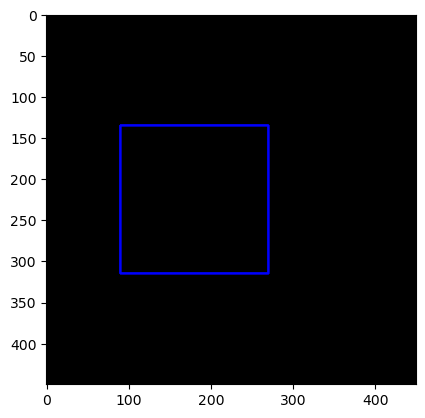

In [47]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

augmented = {
    'image': np.zeros((450, 450, 3), dtype=np.uint8),  
    'bboxes': [(0.2, 0.3, 0.6, 0.7)],  
}

x_min, y_min, x_max, y_max = augmented['bboxes'][0]

image_height, image_width, _ = augmented['image'].shape
x1 = int(x_min * image_width)
y1 = int(y_min * image_height)
x2 = int(x_max * image_width)
y2 = int(y_max * image_height)

bbox_coordinates = (x1, y1, x2, y2)

# Draw the rectangle on the image
cv2.rectangle(augmented['image'], (x1, y1), (x2, y2), (255, 0, 0), 2)

# Display the augmented image
plt.imshow(cv2.cvtColor(augmented['image'], cv2.COLOR_BGR2RGB))
plt.show()

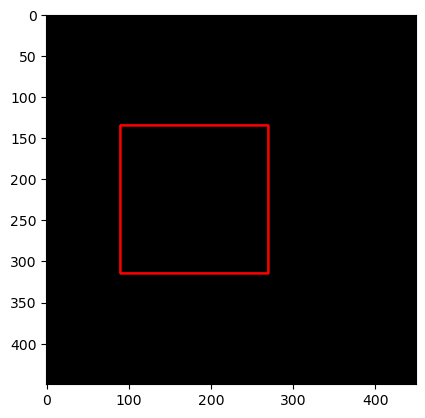

In [48]:
cv2.rectangle(augmented['image'], 
              tuple(np.multiply(augmented['bboxes'][0][:2], [450,450]).astype(int)),
              tuple(np.multiply(augmented['bboxes'][0][2:], [450,450]).astype(int)), 
                    (255,0,0), 2)

plt.imshow(augmented['image'])

In [49]:
# Run Augmentation Pipeline
for partition in ['train','test','val']: 
    for image in os.listdir(os.path.join('C:/Users/Admin/Downloads/data images')):
        img = cv2.imread(os.path.join('data', partition, 'images', image))

        coords = [0,0,0.00001,0.00001]
        label_path = os.path.join('data', partition, 'labels', f'{image.split(".")[0]}.json')
        if os.path.exists(label_path):
            with open(label_path, 'r') as f:
                label = json.load(f)

            coords[0] = label['shapes'][0]['points'][0][0]
            coords[1] = label['shapes'][0]['points'][0][1]
            coords[2] = label['shapes'][0]['points'][1][0]
            coords[3] = label['shapes'][0]['points'][1][1]
            coords = list(np.divide(coords, [640,480,640,480]))

        try: 
            for x in range(60):
                augmented = augmentor(image=img, bboxes=[coords], class_labels=['face'])
                cv2.imwrite(os.path.join('aug_data', partition, 'images', f'{image.split(".")[0]}.{x}.jpg'), augmented['image'])

                annotation = {}
                annotation['image'] = image

                if os.path.exists(label_path):
                    if len(augmented['bboxes']) == 0: 
                        annotation['bbox'] = [0,0,0,0]
                        annotation['class'] = 0 
                    else: 
                        annotation['bbox'] = augmented['bboxes'][0]
                        annotation['class'] = 1
                else: 
                    annotation['bbox'] = [0,0,0,0]
                    annotation['class'] = 0 


                with open(os.path.join('aug_data', partition, 'labels', f'{image.split(".")[0]}.{x}.json'), 'w') as f:
                    json.dump(annotation, f)

        except Exception as e:
            print(e)

image must be numpy array type
image must be numpy array type
image must be numpy array type
image must be numpy array type
image must be numpy array type
image must be numpy array type
image must be numpy array type
image must be numpy array type
image must be numpy array type
image must be numpy array type
image must be numpy array type
image must be numpy array type
image must be numpy array type
image must be numpy array type
image must be numpy array type
image must be numpy array type
image must be numpy array type
image must be numpy array type
image must be numpy array type
image must be numpy array type
image must be numpy array type
image must be numpy array type
image must be numpy array type
image must be numpy array type
image must be numpy array type
image must be numpy array type
image must be numpy array type
image must be numpy array type
image must be numpy array type
image must be numpy array type
image must be numpy array type
image must be numpy array type
image mu

In [66]:
# Load Augmented Images to Tensorflow Dataset
train_images = tf.data.Dataset.list_files('C:/Users/Admin/Downloads/data images/89399881-5f89-11ee-999c-8c16455bd4ce.jpg', shuffle=False)
train_images = train_images.map(load_image)
train_images = train_images.map(lambda x: tf.image.resize(x, (120,120)))
train_images = train_images.map(lambda x: x/255)

In [67]:
test_images = tf.data.Dataset.list_files('C:/Users/Admin/Downloads/data images/411ccb21-5e40-11ee-a072-8c16455bd4ce.jpg', shuffle=False)
test_images = test_images.map(load_image)
test_images = test_images.map(lambda x: tf.image.resize(x, (120,120)))
test_images = test_images.map(lambda x: x/255)

In [68]:
val_images = tf.data.Dataset.list_files('C:/Users/Admin/Downloads/data images/898dc300-5f89-11ee-b054-8c16455bd4ce.jpg', shuffle=False)
val_images = val_images.map(load_image)
val_images = val_images.map(lambda x: tf.image.resize(x, (120,120)))
val_images = val_images.map(lambda x: x/255)

In [70]:
train_images.as_numpy_iterator().next()

array([[[0.64411765, 0.5656863 , 0.46960783],
        [0.62941176, 0.5539216 , 0.46470588],
        [0.6137255 , 0.55490196, 0.44117647],
        ...,
        [0.8571896 , 0.75163406, 0.63464046],
        [0.8833333 , 0.75490195, 0.6254902 ],
        [0.89673233, 0.7692814 , 0.6261441 ]],

       [[0.64705884, 0.57058823, 0.45882353],
        [0.6186274 , 0.54607844, 0.44215685],
        [0.59640527, 0.53758174, 0.4238562 ],
        ...,
        [0.86470586, 0.7627451 , 0.6215686 ],
        [0.88039213, 0.7627451 , 0.61470586],
        [0.90163404, 0.7800654 , 0.62908506]],

       [[0.64411765, 0.5735294 , 0.45588234],
        [0.6215686 , 0.5588235 , 0.44313726],
        [0.5866013 , 0.52777773, 0.40620914],
        ...,
        [0.87058824, 0.76862746, 0.63529414],
        [0.8813726 , 0.7735294 , 0.64215684],
        [0.8879086 , 0.7800654 , 0.6486929 ]],

       ...,

       [[0.27320263, 0.4163399 , 0.56339866],
        [0.2637255 , 0.39607844, 0.53333336],
        [0.3127451 , 0

In [73]:
# Build Label Loading Function
def load_labels(label_path):
    with open(label_path.numpy(), 'r', encoding = "utf-8") as f:
        label = json.load(f)
        
    return [label['class']], label['bbox']

In [74]:
# Load Labels to Tensorflow Dataset
train_labels = tf.data.Dataset.list_files('C:\\Users\\Admin\\Downloads\\data images\\89399881-5f89-11ee-999c-8c16455bd4ce.jpg', shuffle=False)
train_labels = train_labels.map(lambda x: tf.py_function(load_labels, [x], [tf.uint8, tf.float16]))

In [75]:
train_labels = tf.data.Dataset.list_files('C:\\Users\\Admin\\Downloads\\data images\\89399881-5f89-11ee-999c-8c16455bd4ce.jpg', shuffle=False)

In [76]:
test_labels = tf.data.Dataset.list_files('C:\\Users\\Admin\\Downloads\\data images\\411ccb21-5e40-11ee-a072-8c16455bd4ce.jpg', shuffle=False)
test_labels = test_labels.map(lambda x: tf.py_function(load_labels, [x], [tf.uint8, tf.float16]))

In [77]:
val_labels = tf.data.Dataset.list_files('C:\\Users\\Admin\\Downloads\\data images\\898dc300-5f89-11ee-b054-8c16455bd4ce.jpg', shuffle=False)
val_labels = val_labels.map(lambda x: tf.py_function(load_labels, [x], [tf.uint8, tf.float16]))

In [79]:
train_labels.as_numpy_iterator().next()

b'C:\\Users\\Admin\\Downloads\\data images\\89399881-5f89-11ee-999c-8c16455bd4ce.jpg'

In [80]:
# Check Partition Lengths
len(train_images), len(train_labels), len(test_images), len(test_labels), len(val_images), len(val_labels)

(1, 1, 1, 1, 1, 1)

In [81]:
# Create Final Datasets (Images/Labels)

train = tf.data.Dataset.zip((train_images, train_labels))
train = train.shuffle(5000)
train = train.batch(8)
train = train.prefetch(4)

In [82]:
test = tf.data.Dataset.zip((test_images, test_labels))
test = test.shuffle(1300)
test = test.batch(8)
test = test.prefetch(4)

In [83]:
val = tf.data.Dataset.zip((val_images, val_labels))
val = val.shuffle(1000)
val = val.batch(8)
val = val.prefetch(4)

In [84]:
train.as_numpy_iterator().next()[1]

array([b'C:\\Users\\Admin\\Downloads\\data images\\89399881-5f89-11ee-999c-8c16455bd4ce.jpg'],
      dtype=object)

In [85]:
# View Images and Annotations

data_samples = train.as_numpy_iterator()

In [86]:
res = data_samples.next()

In [87]:
sample_coords = res[0][0][idx]

In [152]:
import numpy as np

# Assuming sample_coords is a 2x3 matrix with numerical values
sample_coords = np.array([[1.0, 2.0, 3.0],
                          [4.0, 5.0, 6.0]])

# Create a 2x2 matrix to multiply with
scaling_factor = np.array([120, 120])

# Perform element-wise multiplication
result = tuple(np.multiply(sample_coords[:, :2], scaling_factor).astype(int))


In [156]:
print(sample_coords[:2].shape)

(2, 3)


In [157]:
# Import Layers and Base Network

from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv2D, Dense, GlobalMaxPooling2D
from tensorflow.keras.applications import VGG16

In [158]:
vgg = VGG16(include_top=False)

In [159]:
vgg.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_6 (InputLayer)        [(None, None, None, 3)]   0         
                                                                 
 block1_conv1 (Conv2D)       (None, None, None, 64)    1792      
                                                                 
 block1_conv2 (Conv2D)       (None, None, None, 64)    36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, None, None, 64)    0         
                                                                 
 block2_conv1 (Conv2D)       (None, None, None, 128)   73856     
                                                                 
 block2_conv2 (Conv2D)       (None, None, None, 128)   147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, None, None, 128)   0     

In [160]:
def build_model(): 
    input_layer = Input(shape=(120,120,3))
    
    vgg = VGG16(include_top=False)(input_layer)

    # Classification Model  
    f1 = GlobalMaxPooling2D()(vgg)
    class1 = Dense(2048, activation='relu')(f1)
    class2 = Dense(1, activation='sigmoid')(class1)
    
    # Bounding box model
    f2 = GlobalMaxPooling2D()(vgg)
    regress1 = Dense(2048, activation='relu')(f2)
    regress2 = Dense(4, activation='sigmoid')(regress1)
    
    facetracker = Model(inputs=input_layer, outputs=[class2, regress2])
    return facetracker

In [161]:
facetracker = build_model()

In [162]:
facetracker.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_7 (InputLayer)        [(None, 120, 120, 3)]        0         []                            
                                                                                                  
 vgg16 (Functional)          (None, None, None, 512)      1471468   ['input_7[0][0]']             
                                                          8                                       
                                                                                                  
 global_max_pooling2d_2 (Gl  (None, 512)                  0         ['vgg16[0][0]']               
 obalMaxPooling2D)                                                                                
                                                                                            

In [163]:
X, y = train.as_numpy_iterator().next()

In [164]:
X.shape

(1, 120, 120, 3)

In [165]:
classes, coords = facetracker.predict(X)

1/1 [==============================] - 0s 340ms/step


In [166]:
classes, coords

(array([[0.55971175]], dtype=float32),
 array([[0.4604284, 0.6103365, 0.5220184, 0.504769 ]], dtype=float32))

In [167]:
# Define Optimizer and LR
batches_per_epoch = len(train)
lr_decay = (1./0.75 -1)/batches_per_epoch

In [168]:
opt = tf.keras.optimizers.Adam(learning_rate=0.0001, weight_decay=lr_decay)

In [169]:
def localization_loss(y_true, yhat):            
    delta_coord = tf.reduce_sum(tf.square(y_true[:,:2] - yhat[:,:2]))
                  
    h_true = y_true[:,3] - y_true[:,1] 
    w_true = y_true[:,2] - y_true[:,0] 

    h_pred = yhat[:,3] - yhat[:,1] 
    w_pred = yhat[:,2] - yhat[:,0] 
    
    delta_size = tf.reduce_sum(tf.square(w_true - w_pred) + tf.square(h_true-h_pred))
    
    return delta_coord + delta_size

In [170]:
classloss = tf.keras.losses.BinaryCrossentropy()
regressloss = localization_loss

In [171]:
import tensorflow as tf

# Define your localization loss function
def localization_loss(y_true, yhat):            
    delta_coord = tf.reduce_sum(tf.square(y_true[:, :2] - yhat[:, :2]))
    h_true = y_true[:, 3] - y_true[:, 1] 
    w_true = y_true[:, 2] - y_true[:, 0] 
    h_pred = yhat[:, 3] - yhat[:, 1] 
    w_pred = yhat[:, 2] - yhat[:, 0] 
    delta_size = tf.reduce_sum(tf.square(w_true - w_pred) + tf.square(h_true - h_pred))
    return delta_coord + delta_size

# Define sample values for y_true and coords
y_true = tf.constant([[1.0, 2.0, 5.0, 7.0]], dtype=tf.float32)
coords = tf.constant([[0.5, 1.5, 4.5, 6.5]], dtype=tf.float32)

# Calculate localization loss
loss = localization_loss(y_true, coords)

# Now you can use the 'loss' variable
print("Localization Loss:", loss.numpy())

Localization Loss: 0.5


In [172]:
import tensorflow as tf

# Creating a sample tensor
sample_tensor = tf.constant([[1, 2, 3], [4, 5, 6]])

# Get the shape of the tensor
shape = tf.shape(sample_tensor)

# Access the shape dimensions
num_rows = shape[0]
num_columns = shape[1]

shape = sample_tensor.shape

print("Shape using tf.shape:", shape)
print("Shape using .shape attribute:", shape)
print("Number of rows:", num_rows)
print("Number of columns:", num_columns)

Shape using tf.shape: (2, 3)
Shape using .shape attribute: (2, 3)
Number of rows: tf.Tensor(2, shape=(), dtype=int32)
Number of columns: tf.Tensor(3, shape=(), dtype=int32)


In [173]:
import tensorflow as tf

# Creating a sample tensor
sample_tensor = tf.constant([1.0, 2.0, 3.0])

# Get the data type of the tensor
data_type = sample_tensor.dtype

print("Data type:", data_type)

Data type: <dtype: 'float32'>


In [174]:
import tensorflow as tf

# Creating a sample tensor
sample_tensor = tf.constant([[1, 2, 3], [4, 5, 6]])

# Print the tensor
print("Tensor:")
print(sample_tensor)

Tensor:
tf.Tensor(
[[1 2 3]
 [4 5 6]], shape=(2, 3), dtype=int32)


In [383]:
import tensorflow as tf

# Define y_true and yhat with valid shapes
y_true = tf.constant([[x1, y1, x2, y2]], dtype=tf.float32)  
yhat = tf.constant([[x1_pred, y1_pred, x2_pred, y2_pred]], dtype=tf.float32)

# Calculate localization loss
loss = localization_loss(y_true, yhat)

In [176]:
import tensorflow as tf

# Define your localization loss function
def localization_loss(y_true, yhat):            
    delta_coord = tf.reduce_sum(tf.square(y_true[:, :2] - yhat[:, :2]))
    h_true = y_true[:, 3] - y_true[:, 1] 
    w_true = y_true[:, 2] - y_true[:, 0] 
    h_pred = yhat[:, 3] - yhat[:, 1] 
    w_pred = yhat[:, 2] - yhat[:, 0] 
    delta_size = tf.reduce_sum(tf.square(w_true - w_pred) + tf.square(h_true - h_pred))
    return delta_coord + delta_size

# Define y_true with valid shape
y_true = tf.constant([[x1, y1, x2, y2]], dtype=tf.float32)  

x1_pred = 12.0
y1_pred = 22.0
x2_pred = 48.0
y2_pred = 78.0

yhat = tf.constant([[x1_pred, y1_pred, x2_pred, y2_pred]], dtype=tf.float32)

# Calculate localization loss
loss = localization_loss(y_true, yhat)

print("Localization Loss:", loss.numpy())

Localization Loss: 54965.0


In [177]:
import tensorflow as tf

def localization_loss(y_true, yhat):            
    delta_coord = tf.reduce_sum(tf.square(y_true[:, :2] - yhat[:, :2]))
    h_true = y_true[:, 3] - y_true[:, 1] 
    w_true = y_true[:, 2] - y_true[:, 0]
    
    return loss

In [189]:
# Create Custom Model Class

class FaceTracker(Model): 
    def __init__(self, eyetracker,  **kwargs): 
        super().__init__(**kwargs)
        self.model = eyetracker

    def compile(self, opt, classloss, localizationloss, **kwargs):
        super().compile(**kwargs)
        self.closs = classloss
        self.lloss = localizationloss
        self.opt = opt
    
    def train_step(self, batch, **kwargs): 
        
        X, y = batch
        
        with tf.GradientTape() as tape: 
            classes, coords = self.model(X, training=True)
            
            batch_classloss = self.closs(y[0], classes)
            batch_localizationloss = self.lloss(tf.cast(y[1], tf.float32), coords)
            
            total_loss = batch_localizationloss+0.5*batch_classloss
            
            grad = tape.gradient(total_loss, self.model.trainable_variables)
        
        opt.apply_gradients(zip(grad, self.model.trainable_variables))
        
        return {"total_loss":total_loss, "class_loss":batch_classloss, "regress_loss":batch_localizationloss}
    
    def test_step(self, batch, **kwargs): 
        X, y = batch
        
        classes, coords = self.model(X, training=False)
        
        batch_classloss = self.closs(y[0], classes)
        batch_localizationloss = self.lloss(tf.cast(y[1], tf.float32), coords)
        total_loss = batch_localizationloss+0.5*batch_classloss
        
        return {"total_loss":total_loss, "class_loss":batch_classloss, "regress_loss":batch_localizationloss}
        
    def call(self, X, **kwargs): 
        return self.model(X, **kwargs)

In [190]:
model = FaceTracker(facetracker)

In [191]:
model.compile(opt, classloss, regressloss)

In [192]:
logdir='logs'

In [193]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [211]:
model = tf.keras.Sequential([
    # ... (other layers)
    tf.keras.layers.Dense(1, activation='sigmoid') 
])

In [219]:
import numpy as np

# Convert TensorFlow datasets to NumPy arrays
train_images = np.array(list(train_images.as_numpy_iterator()))
test_images = np.array(list(test_images.as_numpy_iterator()))
val_images = np.array(list(val_images.as_numpy_iterator()))

# Reshape the NumPy arrays
train_images = train_images.reshape(train_images.shape[0], -1)
test_images = test_images.reshape(test_images.shape[0], -1)
val_images = val_images.reshape(val_images.shape[0], -1)

In [220]:
train_images_dataset = tf.data.Dataset.from_tensor_slices(train_images)
test_images_dataset = tf.data.Dataset.from_tensor_slices(test_images)
val_images_dataset = tf.data.Dataset.from_tensor_slices(val_images)

# Combine the reshaped image datasets with the corresponding labels
train_dataset = tf.data.Dataset.zip((train_images_dataset, train_labels))
test_dataset = tf.data.Dataset.zip((test_images_dataset, test_labels))
val_dataset = tf.data.Dataset.zip((val_images_dataset, val_labels))

In [223]:
import tensorflow as tf


# Create TensorFlow datasets from NumPy arrays
train_images_dataset = tf.data.Dataset.from_tensor_slices(train_images)
test_images_dataset = tf.data.Dataset.from_tensor_slices(test_images)
val_images_dataset = tf.data.Dataset.from_tensor_slices(val_images)

# Combine the image datasets with the corresponding labels
train_dataset = tf.data.Dataset.zip((train_images_dataset, train_labels))
test_dataset = tf.data.Dataset.zip((test_images_dataset, test_labels))
val_dataset = tf.data.Dataset.zip((val_images_dataset, val_labels))

In [250]:
import tensorflow as tf


# preprocess images
train_images = tf.data.Dataset.list_files('C:/Users/Admin/Downloads/data images/*.jpg', shuffle=False)
train_images = train_images.map(load_image)

# Resize the images to the desired shape (e.g., 120x120)
desired_image_shape = (120, 120)
train_images = train_images.map(lambda x: tf.image.resize(x, desired_image_shape))

# Normalize the pixel values to the range [0, 1]
train_images = train_images.map(lambda x: x / 255.0)

train_images = train_images.map(lambda x: tf.expand_dims(x, axis=-1))


train_dataset = tf.data.Dataset.zip((train_images, train_labels))




In [251]:
# test 

import tensorflow as tf


# Load and preprocess images
test_images = tf.data.Dataset.list_files('C:/Users/Admin/Downloads/data images/*.jpg', shuffle=False)
test_images = test_images.map(load_image)

# Resize the images to the desired shape (e.g., 120x120)
desired_image_shape = (120, 120)
test_images = test_images.map(lambda x: tf.image.resize(x, desired_image_shape))

# Normalize the pixel values to the range [0, 1]
test_images = test_images.map(lambda x: x / 255.0)

test_images = test_images.map(lambda x: tf.expand_dims(x, axis=-1))


test_dataset = tf.data.Dataset.zip((test_images, test_labels))


In [252]:
# val 

import tensorflow as tf


# Load and preprocess images
val_images = tf.data.Dataset.list_files('C:/Users/Admin/Downloads/data images/*.jpg', shuffle=False)
val_images = val_images.map(load_image)

# Resize the images to the desired shape (e.g., 120x120)
desired_image_shape = (120, 120)
val_images = val_images.map(lambda x: tf.image.resize(x, desired_image_shape))

# Normalize the pixel values to the range [0, 1]
val_images = val_images.map(lambda x: x / 255.0)

# Add a dimension with a size of 1 to make them compatible with tf.image.resize
val_images = val_images.map(lambda x: tf.expand_dims(x, axis=-1))


val_dataset = tf.data.Dataset.zip((val_images, val_labels))

In [253]:
import tensorflow as tf


desired_image_shape = (120, 120)
train_images_resized = [tf.image.resize(x, desired_image_shape) for x in train_images]
val_images_resized = [tf.image.resize(x, desired_image_shape) for x in val_images]

# Flatten the images into 1D arrays
train_images_flat = [tf.reshape(x, (-1, 120 * 120)) for x in train_images_resized]
val_images_flat = [tf.reshape(x, (-1, 120 * 120)) for x in val_images_resized]

# Convert the lists of images to TensorFlow tensors
train_images_flat = [tf.convert_to_tensor(x) for x in train_images_flat]
val_images_flat = [tf.convert_to_tensor(x) for x in val_images_flat]



In [257]:
desired_image_shape = (28, 28)  
train_images_resized = [tf.image.resize(x, desired_image_shape) for x in train_images]
val_images_resized = [tf.image.resize(x, desired_image_shape) for x in val_images]

In [258]:
train_images_flat = [tf.reshape(x, (-1, 784)) for x in train_images_resized]
val_images_flat = [tf.reshape(x, (-1, 784)) for x in val_images_resized]

In [259]:
train_images_flat = [tf.convert_to_tensor(x) for x in train_images_flat]
val_images_flat = [tf.convert_to_tensor(x) for x in val_images_flat]

In [266]:
import numpy as np

# Convert them to NumPy arrays
train_images_flat = np.array(train_images_flat)
train_labels = np.array(train_labels)
val_images_flat = np.array(val_images_flat)

# Now you can access their shapes
print(train_images_flat.shape)
print(train_labels.shape)
print(val_images_flat.shape)

(66, 120, 784)
()
(66, 120, 784)


In [269]:
IMAGE_HEIGHT = 28  
IMAGE_WIDTH = 28   
NUM_CHANNELS = 1   

# reshape your data
train_images_flat = train_images_flat.reshape((-1, IMAGE_HEIGHT, IMAGE_WIDTH, NUM_CHANNELS))
val_images_flat = val_images_flat.reshape((-1, IMAGE_HEIGHT, IMAGE_WIDTH, NUM_CHANNELS))

In [270]:
train_images_flat = train_images_flat.reshape((-1, IMAGE_HEIGHT, IMAGE_WIDTH, NUM_CHANNELS))
val_images_flat = val_images_flat.reshape((-1, IMAGE_HEIGHT, IMAGE_WIDTH, NUM_CHANNELS))

In [272]:
IMAGE_HEIGHT = 28
IMAGE_WIDTH = 28
NUM_CHANNELS = 1

train_images_flat = train_images_flat.reshape((-1, IMAGE_HEIGHT, IMAGE_WIDTH, NUM_CHANNELS))
val_images_flat = val_images_flat.reshape((-1, IMAGE_HEIGHT, IMAGE_WIDTH, NUM_CHANNELS))

In [275]:
IMAGE_HEIGHT = 28
IMAGE_WIDTH = 28
NUM_CHANNELS = 1

train_images_flat = train_images_flat.reshape((-1, IMAGE_HEIGHT, IMAGE_WIDTH, NUM_CHANNELS))
val_images_flat = val_images_flat.reshape((-1, IMAGE_HEIGHT, IMAGE_WIDTH, NUM_CHANNELS))

In [276]:
model = Sequential([
    Flatten(input_shape=(IMAGE_HEIGHT, IMAGE_WIDTH, NUM_CHANNELS)),  
])

In [278]:
train_images = 'C:/Users/Admin/Downloads/data images/89399881-5f89-11ee-999c-8c16455bd4ce.jpg'
train_labels = 'C:\\Users\\Admin\\Downloads\\data images\\89399881-5f89-11ee-999c-8c16455bd4ce.jpg'
print(type(train_images_flat))
print(type(train_labels))

<class 'numpy.ndarray'>
<class 'str'>


In [283]:
print(class_labels)


['class1', 'class2', 'class3', Ellipsis]


In [285]:
valid_class_labels = []

# Iterate through the original class labels and only keep valid strings
for label in class_labels:
    if isinstance(label, str) and label.strip():  
        valid_class_labels.append(label)

from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
label_encoder.fit(valid_class_labels)

labels = label_encoder.transform(valid_class_labels)

In [299]:
train_image_dir = os.path.abspath('C:/Users/Admin/Downloads/data images/train')
test_image_dir = os.path.abspath('C:/Users/Admin/Downloads/data images/test')
val_image_dir = os.path.abspath('C:/Users/Admin/Downloads/data images/val')

In [195]:
bce_loss = tf.keras.losses.BinaryCrossentropy()

batch_classloss = bce_loss(y_true, classes)  # Assuming 

In [196]:
class FaceTracker(tf.keras.Model):
    def __init__(self, model):
        super().__init__()
        self.model = model

    def train_step(self, batch):
        X, y = batch

        with tf.GradientTape() as tape:
            classes, coords = self.model(X, training=True)
            bce_loss = tf.keras.losses.BinaryCrossentropy()(y[0], classes)  # Use BinaryCrossentropy loss

       

        return {"loss": total_loss}

face_tracker = FaceTracker(model)


In [197]:
import tensorflow as tf

model = tf.keras.Sequential([
    
    tf.keras.layers.Dense(1, activation='sigmoid')  # activation for binary classification
])

# loss function for binary classification
bce_loss = tf.keras.losses.BinaryCrossentropy()

# optimizer
optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)

# Compile the model
model.compile(optimizer=optimizer, loss=bce_loss, metrics=['accuracy'])  

class FaceTracker(tf.keras.Model):
    def __init__(self, model):
        super().__init__()
        self.model = model

    def train_step(self, batch):
        X, y = batch

        with tf.GradientTape() as tape:
            classes, coords = self.model(X, training=True)
            bce_loss_value = bce_loss(y[0], classes)  # Use BinaryCrossentropy loss

        

        return {"loss": bce_loss_value}  

face_tracker = FaceTracker(model)


In [198]:
import tensorflow as tf

# model architecture
model = tf.keras.Sequential([
    
    tf.keras.layers.Dense(1, activation='sigmoid')  # sigmoid activation for binary classification
])

# loss function for binary classification
bce_loss = tf.keras.losses.BinaryCrossentropy()

# optimizer
optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)

# Compile the model
model.compile(optimizer=optimizer, loss=bce_loss, metrics=['accuracy'])  


In [199]:
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(64, 64, 3)),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')  
])

In [200]:
optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)

In [201]:
loss_function = tf.keras.losses.BinaryCrossentropy()  # For binary classification

In [202]:
model.compile(optimizer=optimizer, loss=loss_function, metrics=['accuracy'])

In [204]:
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(64, 64, 3)),
    # ...
])

In [205]:
model = Sequential()
model.add(Input(shape=(64, 64, 3)))  

In [206]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input

model = Sequential()
model.add(Input(shape=(64, 64, 3)))  

In [207]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [382]:
import cv2
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import categorical_crossentropy


In [209]:
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy

In [317]:
import cv2
import numpy as np


# Resize images to 28x28 pixels
train_images_resized = np.array([cv2.resize(img, (28, 28)) for img in train_images])
val_images_resized = np.array([cv2.resize(img, (28, 28)) for img in val_images])

In [316]:
# Normalize pixel values to the [0, 1] range
train_images_resized = train_images_resized / 255.0
val_images_resized = val_images_resized / 255.0

In [315]:
import cv2
import numpy as np


# Resize images to 28x28 pixels
train_images_resized = np.array([cv2.resize(img, (28, 28)) for img in train_images])
val_images_resized = np.array([cv2.resize(img, (28, 28)) for img in val_images])

train_images_resized = train_images_resized / 255.0
val_images_resized = val_images_resized / 255.0

In [313]:
import cv2
import numpy as np

# Load a single image
image_path = 'C:/Users/Admin/Downloads/data images/89399881-5f89-11ee-999c-8c16455bd4ce.jpg'
img = cv2.imread(image_path)

# Resize the image to 28x28 pixels
img_resized = cv2.resize(img, (28, 28))

# Normalize pixel values to the [0, 1] range
img_resized = img_resized / 255.0

In [322]:
import cv2
import numpy as np

train_image_dir = 'C:/Users/Admin/Downloads/data images'
val_image_dir = 'C:/Users/Admin/Downloads/data images'

train_images_resized = []
for image_file in os.listdir(train_image_dir):
    image_path = os.path.join(train_image_dir, image_file)
    img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)  e
    img = cv2.resize(img, (28, 28))  # Resize to 28x28 pixels
    img = img / 255.0  # Normalize pixel values to [0, 1]
    train_images_resized.append(img)

# Converted the list of images to a NumPy array
train_images_resized = np.array(train_images_resized)

val_images_resized = []
for image_file in os.listdir(val_image_dir):
    image_path = os.path.join(val_image_dir, image_file)
    img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    img = cv2.resize(img, (28, 28))
    img = img / 255.0
    val_images_resized.append(img)

val_images_resized = np.array(val_images_resized)

In [325]:
import cv2
import numpy as np


# Resize images to 28x28 pixels
train_images_resized = np.array([cv2.resize(img, (28, 28)) for img in train_images])
val_images_resized = np.array([cv2.resize(img, (28, 28)) for img in val_images])

# Convert images to grayscale (if needed)
train_images_resized = np.array([cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) for img in train_images_resized])
val_images_resized = np.array([cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) for img in val_images_resized])

train_images_resized = train_images_resized / 255.0
val_images_resized = val_images_resized / 255.0

In [327]:
import cv2
import numpy as np


train_images_resized = np.array([cv2.resize(cv2.cvtColor(img, cv2.COLOR_BGR2GRAY), (28, 28)) for img in train_images])
val_images_resized = np.array([cv2.resize(cv2.cvtColor(img, cv2.COLOR_BGR2GRAY), (28, 28)) for img in val_images])

train_images_resized = train_images_resized / 255.0
val_images_resized = val_images_resized / 255.0

In [329]:
import cv2
import numpy as np


train_images_resized = np.array([cv2.resize(cv2.cvtColor(img, cv2.COLOR_BGR2GRAY), (28, 28)) for img in train_images])
val_images_resized = np.array([cv2.resize(cv2.cvtColor(img, cv2.COLOR_BGR2GRAY), (28, 28)) for img in val_images])

train_images_resized = train_images_resized / 255.0
val_images_resized = val_images_resized / 255.0

In [330]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [340]:
model = Sequential([
    Conv2D(32, (3, 3), input_shape=(28, 28, 1), activation='relu'),
    
    Flatten(),
    Dense(10, activation='softmax')
])

In [341]:
import cv2
import numpy as np


train_images_resized = np.array([cv2.resize(cv2.cvtColor(img, cv2.COLOR_BGR2GRAY), (28, 28)) for img in train_images])
val_images_resized = np.array([cv2.resize(cv2.cvtColor(img, cv2.COLOR_BGR2GRAY), (28, 28)) for img in val_images])

train_images_resized = train_images_resized / 255.0
val_images_resized = val_images_resized / 255.0

In [343]:
model.compile(
    optimizer='adam',  
    loss='sparse_categorical_crossentropy',  
    metrics=['accuracy']  
)

In [346]:
import numpy as np

# Convert your labels to NumPy arrays
train_labels = np.array(train_labels)
val_labels = np.array(val_labels)


In [348]:
import tensorflow as tf
from tensorflow.keras import layers, models
import numpy as np

# Train the model
history = model.fit(train_images, train_labels, epochs=10, validation_data=(val_images, val_labels))

Epoch 1/10
4/4 [==============================] - 2s 136ms/step - loss: 2.3108 - accuracy: 0.0900 - val_loss: 2.3073 - val_accuracy: 0.1500
Epoch 2/10
4/4 [==============================] - 0s 37ms/step - loss: 2.2939 - accuracy: 0.1400 - val_loss: 2.3174 - val_accuracy: 0.1500
Epoch 3/10
4/4 [==============================] - 0s 34ms/step - loss: 2.2744 - accuracy: 0.1400 - val_loss: 2.3201 - val_accuracy: 0.1000
Epoch 4/10
4/4 [==============================] - 0s 59ms/step - loss: 2.2662 - accuracy: 0.1400 - val_loss: 2.3324 - val_accuracy: 0.1000
Epoch 5/10
4/4 [==============================] - 0s 40ms/step - loss: 2.2622 - accuracy: 0.1300 - val_loss: 2.3608 - val_accuracy: 0.1000
Epoch 6/10
4/4 [==============================] - 0s 41ms/step - loss: 2.2550 - accuracy: 0.1500 - val_loss: 2.3896 - val_accuracy: 0.2000
Epoch 7/10
4/4 [==============================] - 0s 43ms/step - loss: 2.2560 - accuracy: 0.1900 - val_loss: 2.4024 - val_accuracy: 0.1500
Epoch 8/10
4/4 [==========

In [353]:
history.history

{'loss': [2.310764789581299,
  2.29390549659729,
  2.274362325668335,
  2.2661514282226562,
  2.2621521949768066,
  2.2550106048583984,
  2.256030797958374,
  2.2527849674224854,
  2.2494537830352783,
  2.250873565673828],
 'accuracy': [0.09000000357627869,
  0.14000000059604645,
  0.14000000059604645,
  0.14000000059604645,
  0.12999999523162842,
  0.15000000596046448,
  0.1899999976158142,
  0.14000000059604645,
  0.1599999964237213,
  0.14000000059604645],
 'val_loss': [2.3072681427001953,
  2.317351818084717,
  2.3200759887695312,
  2.332428455352783,
  2.3608148097991943,
  2.3895926475524902,
  2.4023752212524414,
  2.377946138381958,
  2.356628894805908,
  2.3386707305908203],
 'val_accuracy': [0.15000000596046448,
  0.15000000596046448,
  0.10000000149011612,
  0.10000000149011612,
  0.10000000149011612,
  0.20000000298023224,
  0.15000000596046448,
  0.20000000298023224,
  0.10000000149011612,
  0.10000000149011612]}

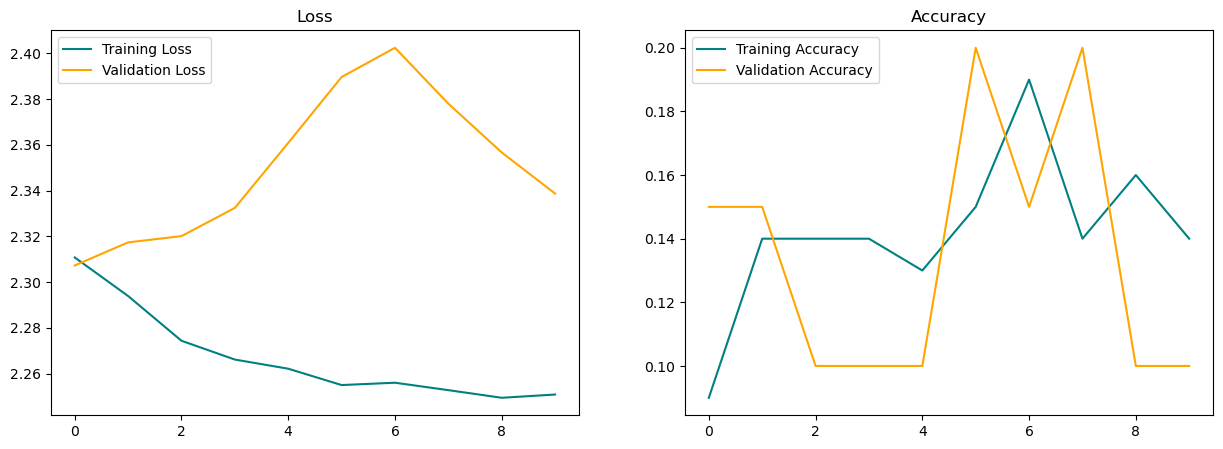

In [356]:
fig, ax = plt.subplots(ncols=2, figsize=(15, 5))

# Plot training & validation loss
ax[0].plot(history.history['loss'], color='teal', label='Training Loss')
ax[0].plot(history.history['val_loss'], color='orange', label='Validation Loss')
ax[0].set_title('Loss')
ax[0].legend()

# Plot training & validation accuracy (if applicable)
if 'accuracy' in history.history:
    ax[1].plot(history.history['accuracy'], color='teal', label='Training Accuracy')
    ax[1].plot(history.history['val_accuracy'], color='orange', label='Validation Accuracy')
    ax[1].set_title('Accuracy')
    ax[1].legend()

plt.show()

In [369]:
test_data = test.as_numpy_iterator()

In [376]:
from tensorflow.keras.models import load_model

In [380]:
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy

In [381]:
pre = Precision()
re = Recall()
acc = BinaryAccuracy()

In [379]:
# Real Time Detection

cap = cv2.VideoCapture(0)
while cap.isOpened():
    _ , frame = cap.read()
    frame = frame[50:500, 50:500,:]
    
    rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
    resized = tf.image.resize(rgb, (120,120))
    
    yhat = facetracker.predict(np.expand_dims(resized/255,0))
    sample_coords = yhat[1][0]
    
    if yhat[0] > 0.5: 
        # Controls the main rectangle
        cv2.rectangle(frame, 
                      tuple(np.multiply(sample_coords[:2], [450,450]).astype(int)),
                      tuple(np.multiply(sample_coords[2:], [450,450]).astype(int)), 
                            (255,0,0), 2)
        
        cv2.rectangle(frame, 
                      tuple(np.add(np.multiply(sample_coords[:2], [450,450]).astype(int), 
                                    [0,-30])),
                      tuple(np.add(np.multiply(sample_coords[:2], [450,450]).astype(int),
                                    [80,0])), 
                            (255,0,0), -1)
        
        # Controls the text rendered
        cv2.putText(frame, 'face', tuple(np.add(np.multiply(sample_coords[:2], [450,450]).astype(int),
                                               [0,-5])),
                    cv2.FONT_HERSHEY_SIMPLEX, 1, (255,255,255), 2, cv2.LINE_AA)
    
    cv2.imshow('EyeTrack', frame)
    
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break
cap.release()
cv2.destroyAllWindows()

1/1 [==============================] - 0s 94ms/step
